In [1]:
# !pip --q install pandas seaborn matplotlib scikit-learn numpy scipy statsmodels openpyxl xlrd plotly

In [2]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap  # To create custom colormaps
import numpy as np
import scipy as sp
import statsmodels as sm
from datetime import datetime, timedelta
from helper_functions import plot_correlation_matrix, missing_values_summary



In [3]:
df = pd.read_excel('data/2025 Feb Data for recruitment task (1).xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   ISBN                                          4698 non-null   int64         
 1   Product title                                 4698 non-null   object        
 2   Brand                                         4698 non-null   object        
 3   Pub Date                                      4698 non-null   datetime64[ns]
 4   Retailer sales out last week                  4698 non-null   int64         
 5   Retailer number of units in stock             4698 non-null   int64         
 6   Retailer projected weeks of stock on Hand     2900 non-null   float64       
 7   Number of units reatiler has ordered from DK  4698 non-null   int64         
 8   Current number of units in DK warehouse       4698 non-null   int64 

In [4]:
df.head()

,ISBN,Product title,Brand,Pub Date,Retailer sales out last week,Retailer number of units in stock,Retailer projected weeks of stock on Hand,Number of units reatiler has ordered from DK,Current number of units in DK warehouse,Print status,Current Preorders total,Reprint Quantity,Reprint Date,Forecast sales for this week,Forecast sales for next 4 weeks,Forecast sales for next 12 weeks
0,9780241734612,The Magic Balloon: World Book Day 2025,DK Children 0-9,2025-02-06,1947,1066,0.868003,0,950,Reprint under Review,,,NaT,1197.0,3185.0,6747.0
1,9781464221361,Never Lie: From the Sunday Times Bestselling A...,DK Other,2023-12-05,1753,2518,1.611930,0,10365,Reprinting,,,NaT,1492.0,3517.0,7598.0
2,9781464228636,The Crash: The #1 Sunday Times Bestseller! A P...,DK Other,2025-01-28,1597,3850,2.610246,1,20468,In Print,,,NaT,1542.0,5667.0,12154.0
3,9781464228599,The Perfect Son: From the Sunday Times Bestsel...,DK Other,2024-08-06,1488,1706,1.714936,1,5098,In Print,,,NaT,1098.0,2757.0,5505.0
4,9780241740859,LEGO Our Amazing Universe: World Book Day 2025...,DK Licensing,2025-02-06,1365,1214,1.328540,2012,3991,In Print,,3000,2025-01-10,904.0,2140.0,4424.0


In [5]:
# df['Reprint Date ']
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

In [6]:
# check missing values
missing_values_summary(df)

,Missing Values,Percentage
Reprint Date,4235,90.144742


In [7]:
df.duplicated().sum()  # no duplicated rows

np.int64(0)

In [8]:
df['ISBN'].nunique()  # all books in the dataset are unique

4698

In [9]:
df['Print status'].value_counts()

Print status
In Print                  3214
Out of Print               636
No Longer Distributed      362
NOT YET PUBLISHED          274
Reprinting                 103
Reprint under Review        92
Publication Cancelled       11
OP - Rights Reverted         3
Currently not for Sale       3
Name: count, dtype: int64

In [10]:
df['Current Preorders total'].value_counts()

Current Preorders total
       4442
1        53
2        24
3        22
4        19
       ... 
44        1
874       1
24        1
46        1
77        1
Name: count, Length: 66, dtype: int64

In [11]:
df['Reprint Quantity'].value_counts()

Reprint Quantity
        4235
2000      72
1500      72
1000      62
3000      46
        ... 
520        1
1290       1
1300       1
1970       1
3760       1
Name: count, Length: 98, dtype: int64

In [12]:
cols_to_convert = ['Current Preorders total', 'Reprint Quantity']

# Replace empty strings and NaN with 0, then convert to float
df[cols_to_convert] = df[cols_to_convert].replace({'': 0,' ': 0, None: 0}).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   ISBN                                          4698 non-null   int64         
 1   Product title                                 4698 non-null   object        
 2   Brand                                         4698 non-null   object        
 3   Pub Date                                      4698 non-null   datetime64[ns]
 4   Retailer sales out last week                  4698 non-null   int64         
 5   Retailer number of units in stock             4698 non-null   int64         
 6   Retailer projected weeks of stock on Hand     2900 non-null   float64       
 7   Number of units reatiler has ordered from DK  4698 non-null   int64         
 8   Current number of units in DK warehouse       4698 non-null   int64 

/var/folders/gg/9r5r1_cx0j332ldkpzq14jfw0000gn/T/ipykernel_92466/3513045851.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_to_convert] = df[cols_to_convert].replace({'': 0,' ': 0, None: 0}).astype(float)


In [13]:
# Automated inventory report
inventory_report = df.groupby("Brand").agg({
    "Retailer sales out last week": "sum",
    "Retailer number of units in stock": "sum",
    "Current number of units in DK warehouse": "sum",
    "Forecast sales for next 4 weeks": "sum"
}).reset_index()

# Create stock risk column

In [14]:
# AI risk model for stock prediction
df["Stock Risk"] = np.where(
    (df["Retailer number of units in stock"] + df["Current number of units in DK warehouse"]) < df["Forecast sales for next 4 weeks"],
    "High", "Low"
)

In [15]:
# Save report to CSV
inventory_report.to_csv("data/automated_inventory_report.csv", index=False)

/var/folders/gg/9r5r1_cx0j332ldkpzq14jfw0000gn/T/ipykernel_92466/1779786587.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["Stock Risk"], bins=2, kde=False, palette="coolwarm")


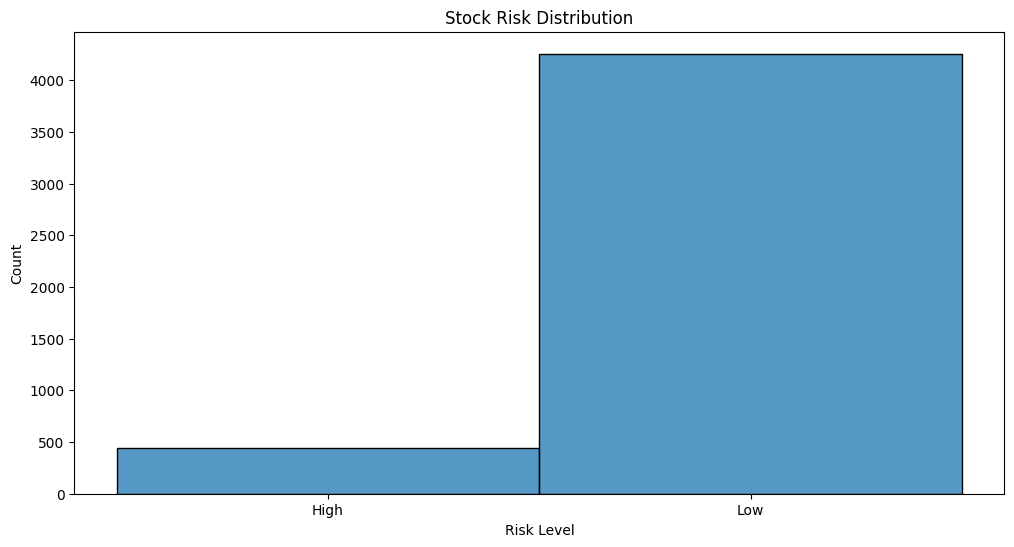

In [16]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df["Stock Risk"], bins=2, kde=False, palette="coolwarm")
plt.title("Stock Risk Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()


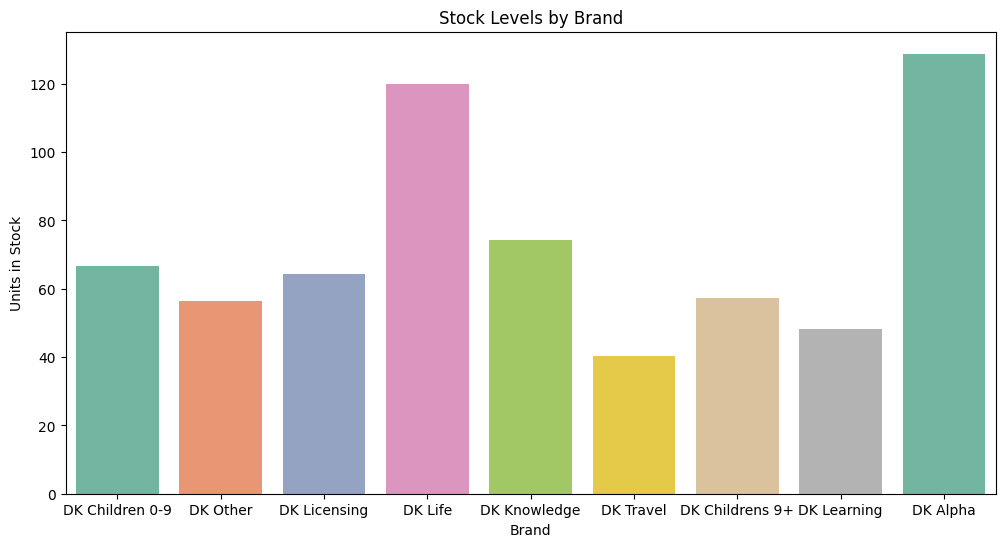

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Brand", y="Retailer number of units in stock", data=df, errorbar=None, palette="Set2", hue="Brand", legend=False)
plt.title("Stock Levels by Brand")
plt.xlabel("Brand")
plt.ylabel("Units in Stock")
plt.show()

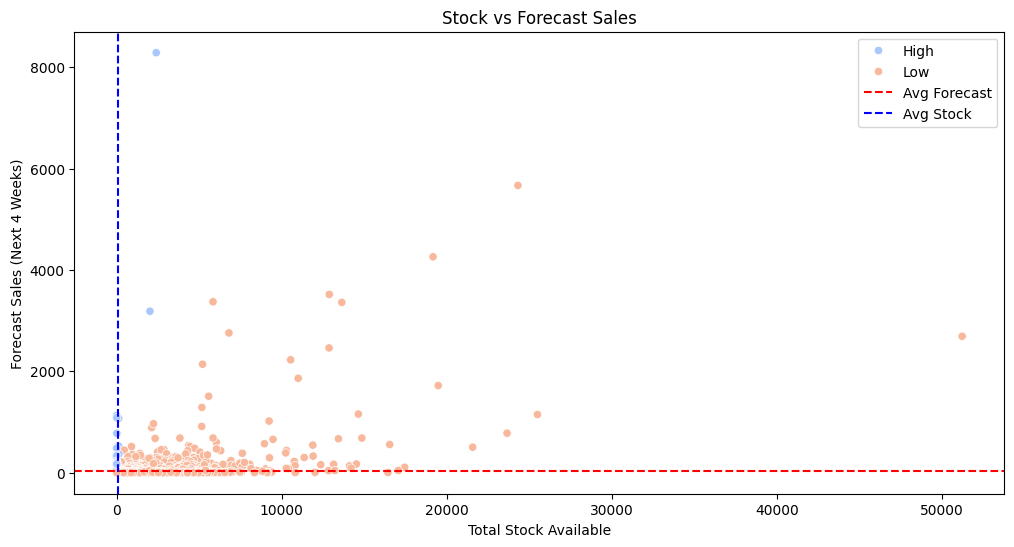

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Retailer number of units in stock"] + df["Current number of units in DK warehouse"],
                y=df["Forecast sales for next 4 weeks"], hue=df["Stock Risk"], palette="coolwarm")
plt.axhline(y=df["Forecast sales for next 4 weeks"].mean(), color='red', linestyle='--', label="Avg Forecast")
plt.axvline(x=df["Retailer number of units in stock"].mean(), color='blue', linestyle='--', label="Avg Stock")
plt.title("Stock vs Forecast Sales")
plt.xlabel("Total Stock Available")
plt.ylabel("Forecast Sales (Next 4 Weeks)")
plt.legend()
plt.show()


In [19]:
import plotly.express as px

# Create a new column for hover information
df["Hover Info"] = df["ISBN"].astype(str) + "<br>" + df["Product title"]

# Create interactive scatter plot
fig = px.scatter(df, 
                 x=df["Retailer number of units in stock"] + df["Current number of units in DK warehouse"],
                 y=df["Forecast sales for next 4 weeks"], 
                 color=df["Stock Risk"], 
                 hover_data=["ISBN", "Product title"], 
                 title="Stock vs Forecast Sales")

fig.update_layout(xaxis_title="Total Stock Available",
                  yaxis_title="Forecast Sales (Next 4 Weeks)")

# Show the interactive plot
fig.show()

In [20]:
# Display sample data and risk assessment
df[["ISBN", 
    "Product title", 
    "Retailer number of units in stock", 
    "Current number of units in DK warehouse", 
    "Forecast sales for next 4 weeks", "Stock Risk"]].head()


,ISBN,Product title,Retailer number of units in stock,Current number of units in DK warehouse,Forecast sales for next 4 weeks,Stock Risk
0,9780241734612,The Magic Balloon: World Book Day 2025,1066,950,3185.0,High
1,9781464221361,Never Lie: From the Sunday Times Bestselling A...,2518,10365,3517.0,Low
2,9781464228636,The Crash: The #1 Sunday Times Bestseller! A P...,3850,20468,5667.0,Low
3,9781464228599,The Perfect Son: From the Sunday Times Bestsel...,1706,5098,2757.0,Low
4,9780241740859,LEGO Our Amazing Universe: World Book Day 2025...,1214,3991,2140.0,Low


In [21]:
df.drop(columns=["Hover Info"]).to_csv("data/inventory_data_with_risk.csv", index=False)

What are the top 5 selling books this week and what is the retailer stock inventory for each of them?

In [22]:
df.sort_values(by="Forecast sales for this week", ascending=False)[["Product title", "Retailer number of units in stock"]].head(5)


,Product title,Retailer number of units in stock
7,How to Design a Garden: Create and Maintain Yo...,2397
2,The Crash: The #1 Sunday Times Bestseller! A P...,3850
1,Never Lie: From the Sunday Times Bestselling A...,2518
0,The Magic Balloon: World Book Day 2025,1066
6,The Housemaid Is Watching: An Instant Sunday T...,7265


Heatmaps ( factors correlations )

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   ISBN                                          4698 non-null   int64         
 1   Product title                                 4698 non-null   object        
 2   Brand                                         4698 non-null   object        
 3   Pub Date                                      4698 non-null   datetime64[ns]
 4   Retailer sales out last week                  4698 non-null   int64         
 5   Retailer number of units in stock             4698 non-null   int64         
 6   Retailer projected weeks of stock on Hand     2900 non-null   float64       
 7   Number of units reatiler has ordered from DK  4698 non-null   int64         
 8   Current number of units in DK warehouse       4698 non-null   int64 

In [24]:
# Select numerical columns (int and float)
numerical_df = df.select_dtypes(include=['number']).drop(columns=['ISBN'])

# Select non-numerical columns (object, bool, category, etc.)
non_numerical_df = df.select_dtypes(exclude=['number'])

In [25]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Retailer sales out last week                  4698 non-null   int64  
 1   Retailer number of units in stock             4698 non-null   int64  
 2   Retailer projected weeks of stock on Hand     2900 non-null   float64
 3   Number of units reatiler has ordered from DK  4698 non-null   int64  
 4   Current number of units in DK warehouse       4698 non-null   int64  
 5   Current Preorders total                       4698 non-null   float64
 6   Reprint Quantity                              4698 non-null   float64
 7   Forecast sales for this week                  4568 non-null   float64
 8   Forecast sales for next 4 weeks               4568 non-null   float64
 9   Forecast sales for next 12 weeks              4568 non-null   f

In [26]:
numerical_df.describe()

,Retailer sales out last week,Retailer number of units in stock,Retailer projected weeks of stock on Hand,Number of units reatiler has ordered from DK,Current number of units in DK warehouse,Current Preorders total,Reprint Quantity,Forecast sales for this week,Forecast sales for next 4 weeks,Forecast sales for next 12 weeks
count,4698.000000,4698.000000,2900.000000,4698.000000,4698.000000,4698.000000,4698.000000,4568.000000,4568.000000,4568.000000
mean,8.603448,64.934014,12.934885,1.514049,1000.143040,2.500213,227.904427,10.621060,38.714317,116.396235
std,68.178813,219.557341,31.957057,33.381395,1825.527451,39.578540,875.712212,74.642453,223.623591,531.441018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.214862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,11.000000,7.500000,0.000000,422.500000,0.000000,0.000000,1.000000,5.000000,20.000000
75%,4.000000,48.000000,13.000000,0.000000,1332.250000,0.000000,0.000000,6.000000,24.000000,77.250000
max,1947.000000,7265.000000,900.000000,2012.000000,51238.000000,1398.000000,12000.000000,3236.000000,8284.000000,14020.000000


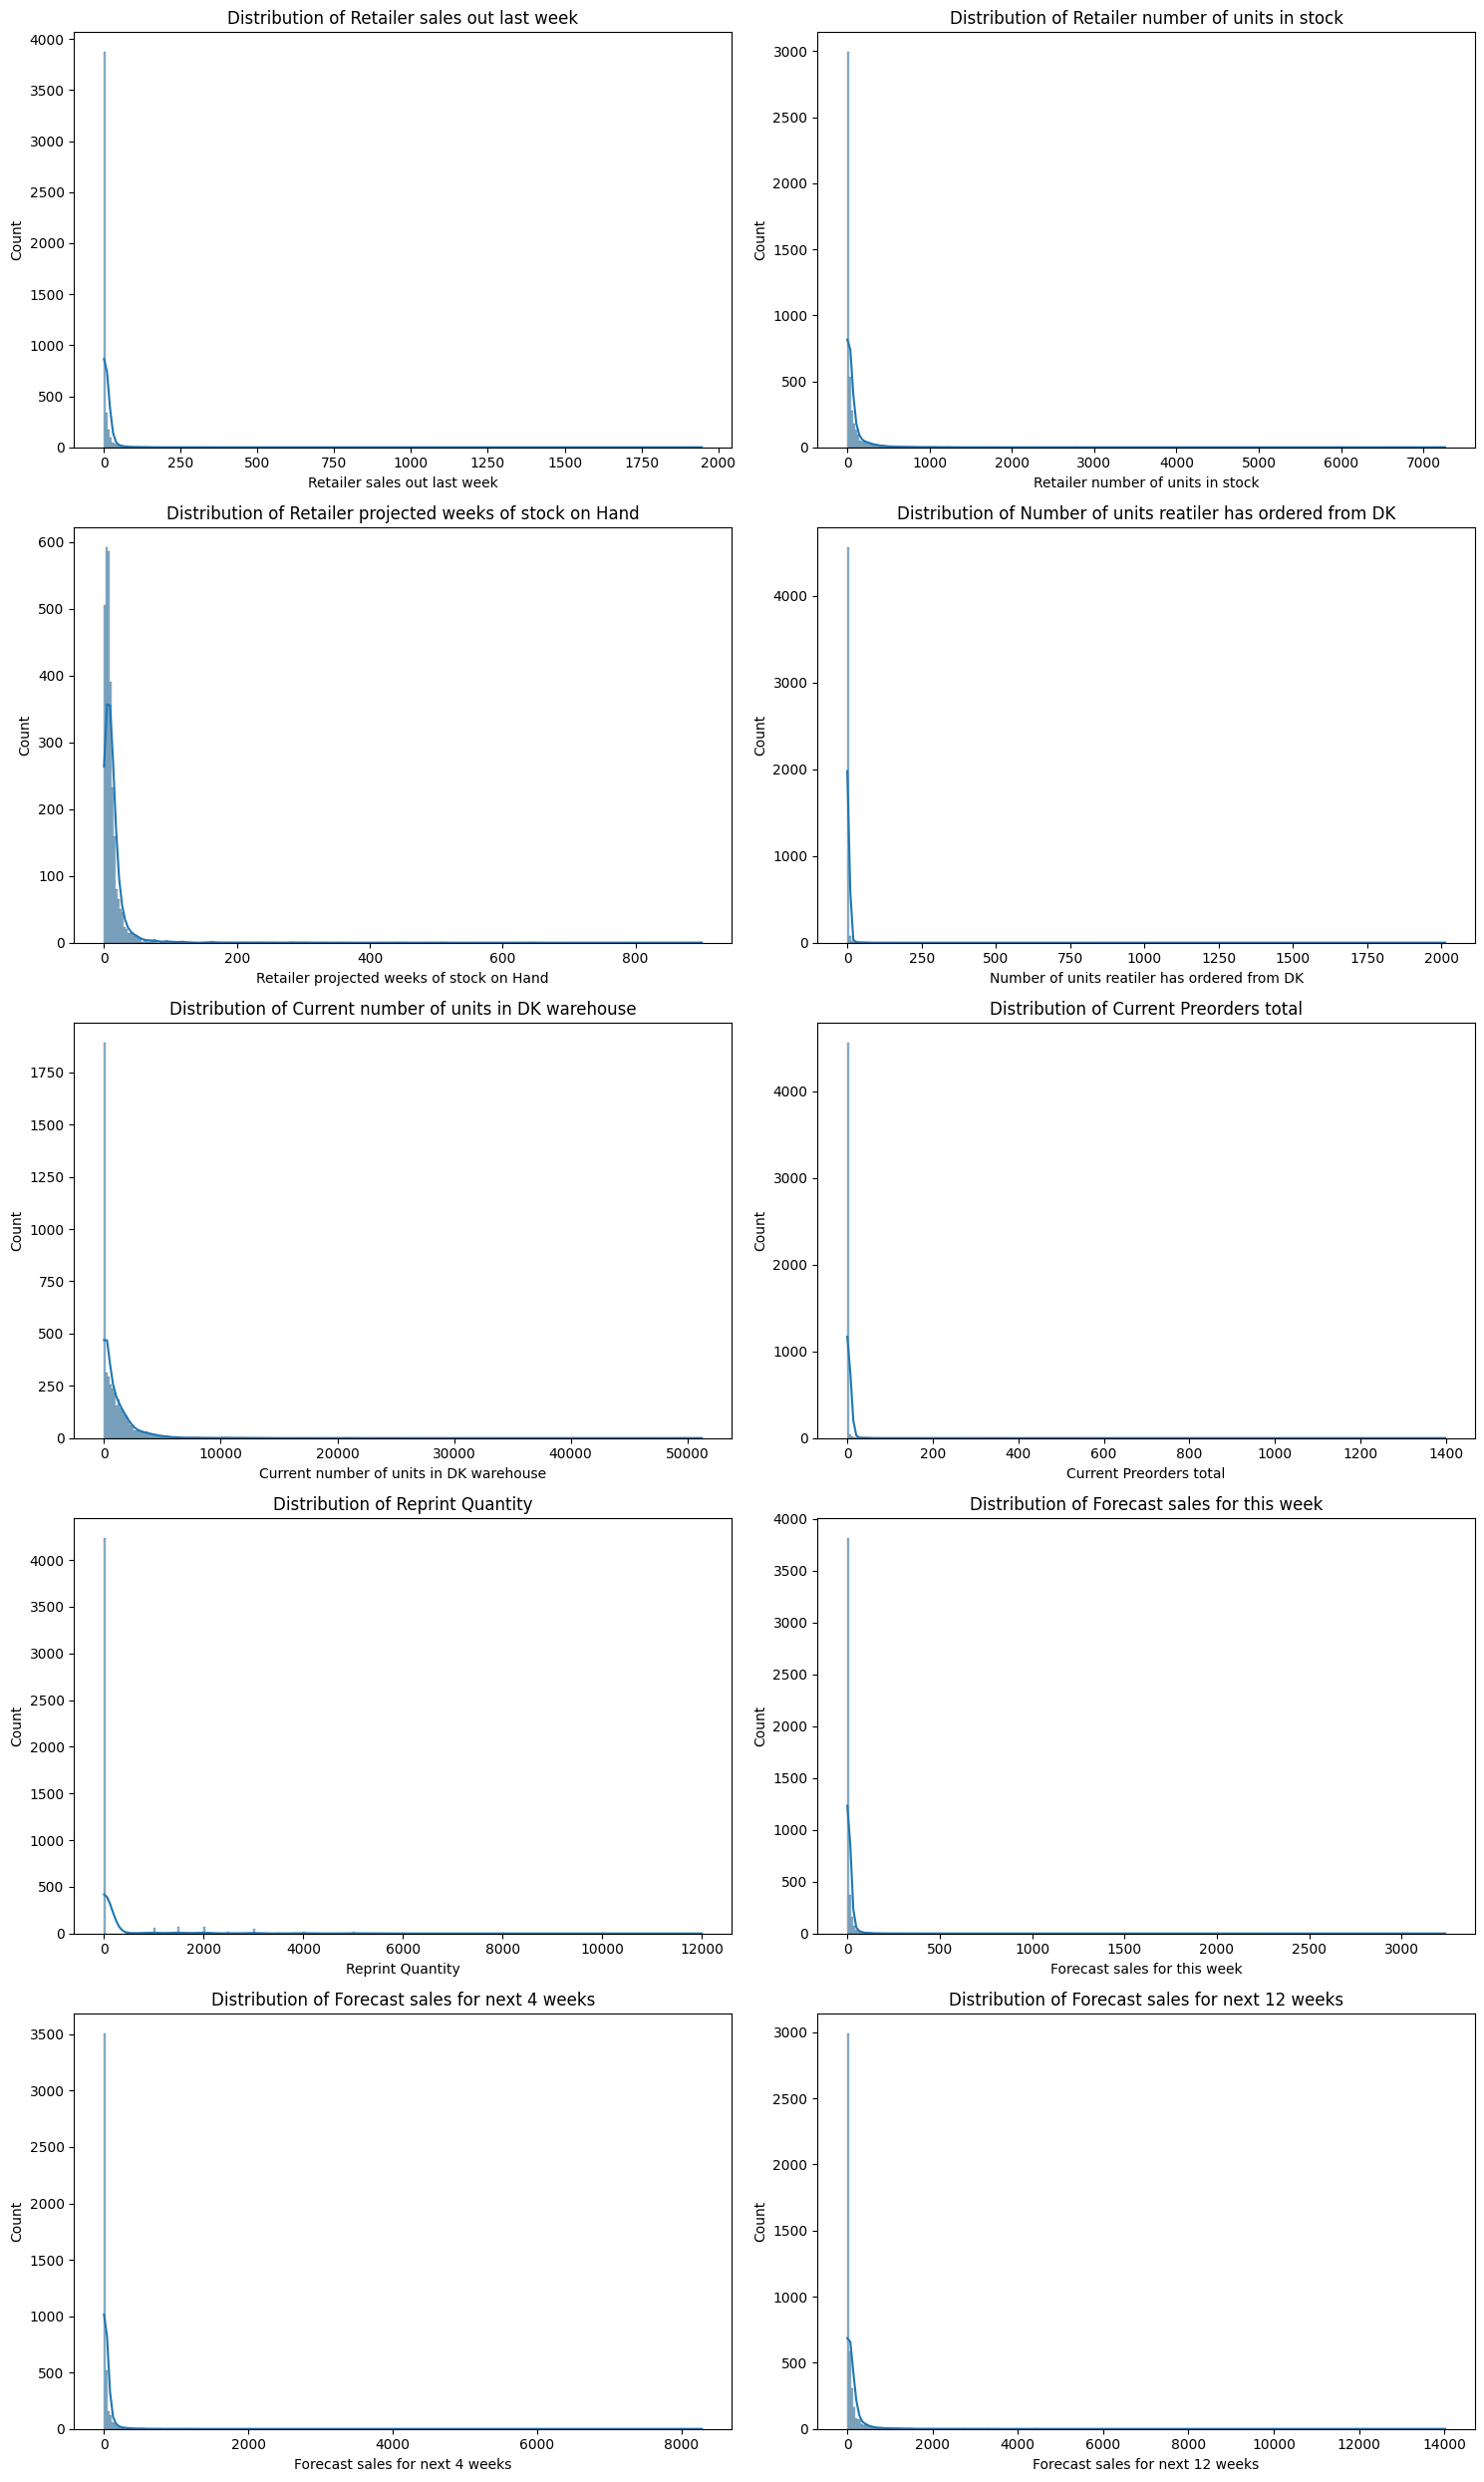

In [27]:
# 1. Plot distributions
# Determine the number of rows needed for a 3-column layout
num_cols = 2
num_rows = math.ceil(len(numerical_df.columns) / num_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten axes array for easy iteration (works even if we have only one row)
axes = axes.flatten()

# Plot distributions
for i, col in enumerate(numerical_df.columns):
    sns.histplot(numerical_df[col], kde=True, ax=axes[i], bins=300)
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


(<Figure size 1000x1000 with 2 Axes>,
 <Axes: title={'center': 'Correlation Matrix : All Correlations Below the Diagonal;\nAbove the Diagonal, Only Correlations > ±0.8'}, xlabel='Features', ylabel='Features'>)

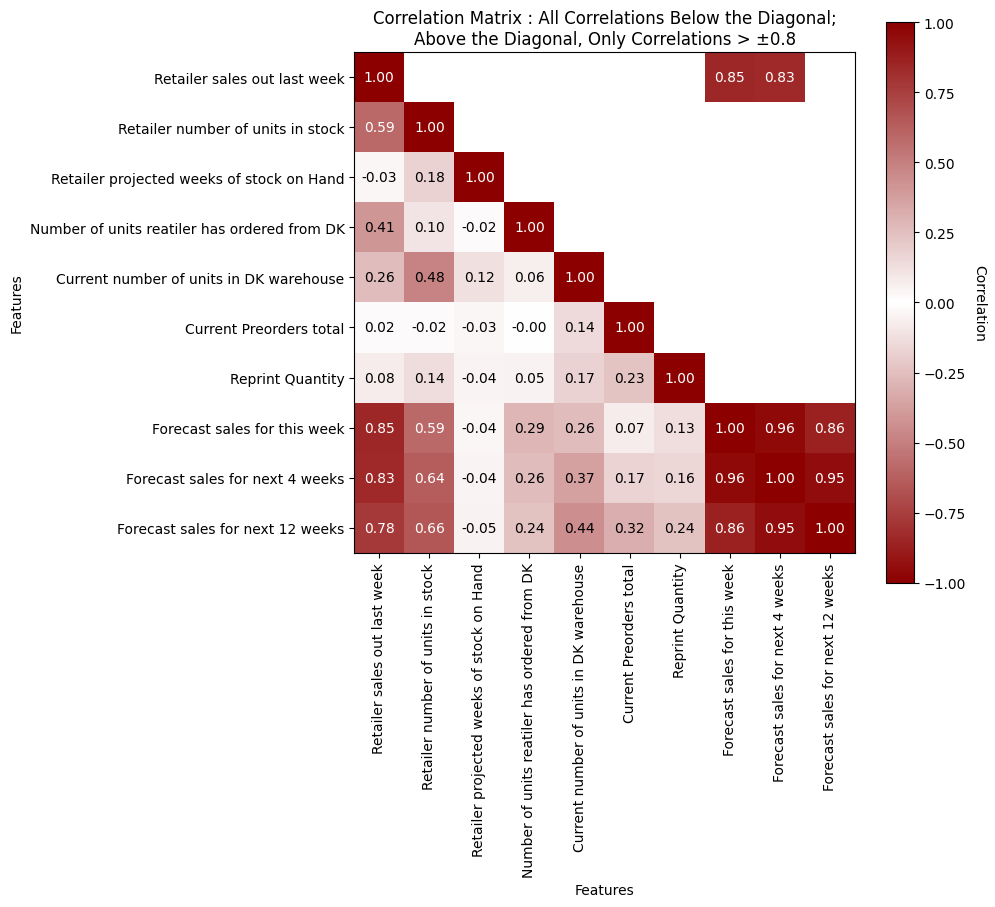

In [28]:
# 2. Correlation Heatmap
plot_correlation_matrix(numerical_df, figsize=(10, 10))

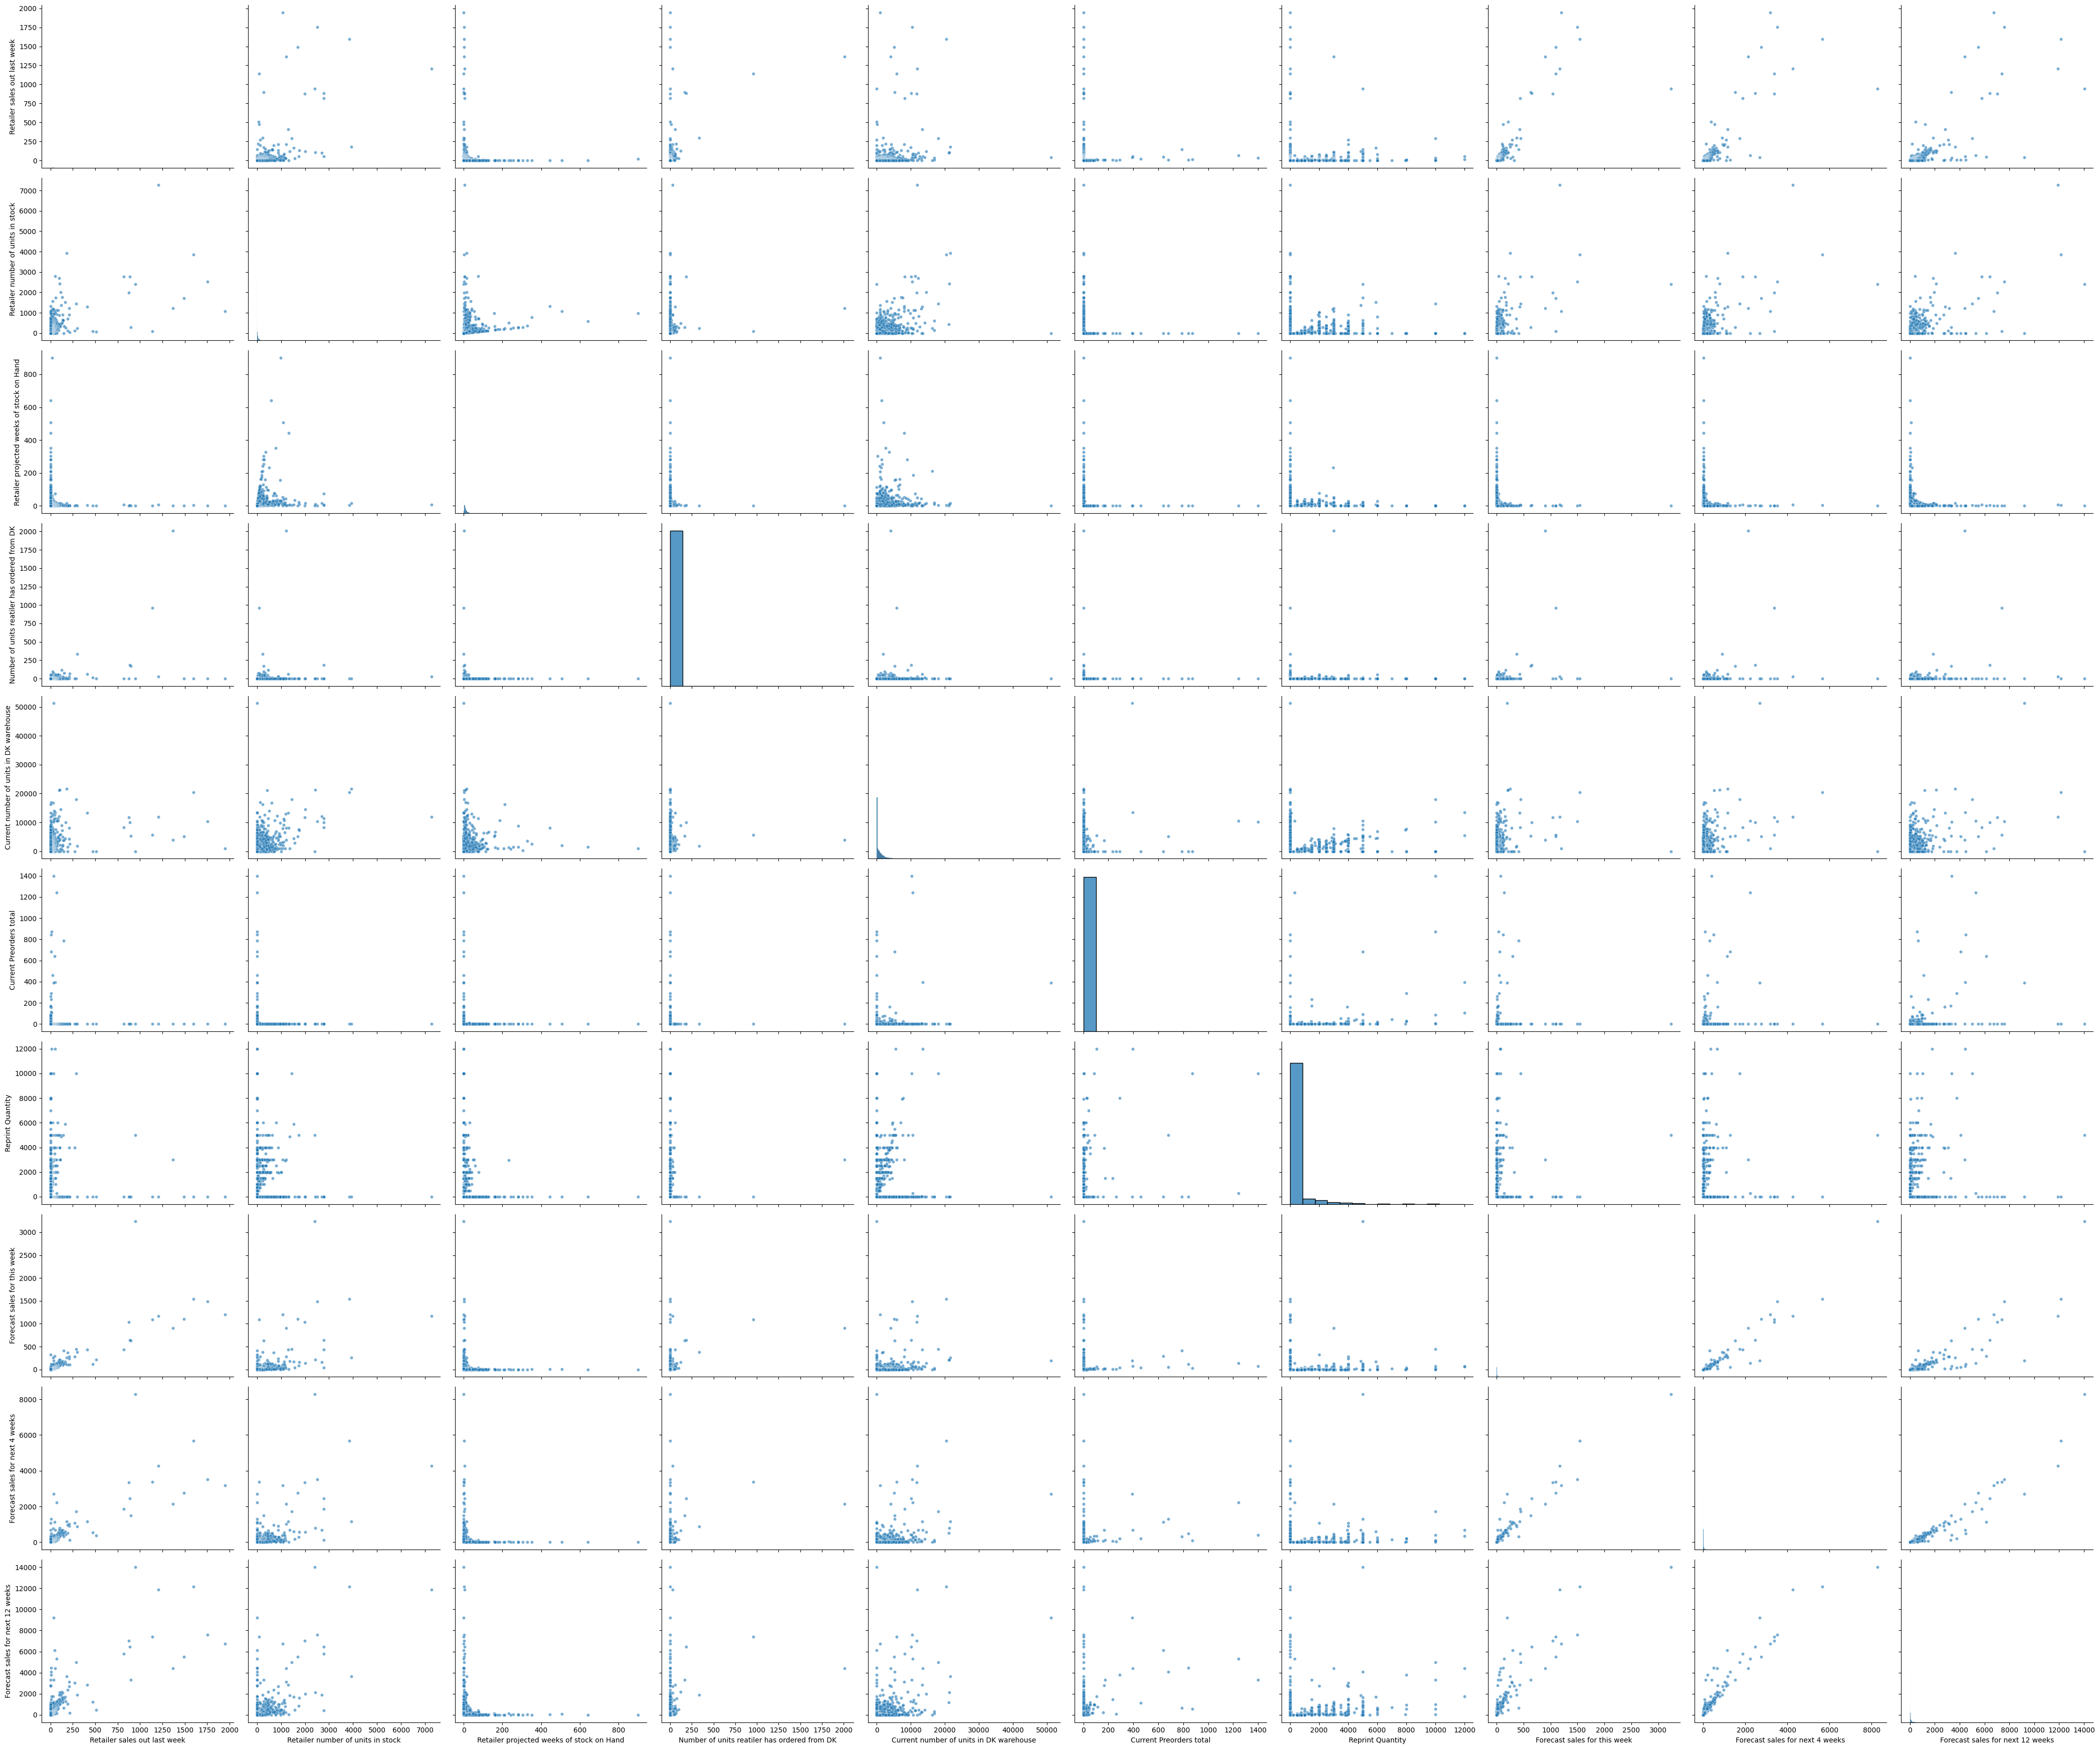

In [29]:
# 3. Scatterplot Matrix
sns.pairplot(numerical_df, corner=False, plot_kws={'alpha': 0.6, 's': 20}, height=3.5, aspect=1.2)
plt.tight_layout()
plt.show()

Classification model to classify books by risk level

In [47]:
np.random.seed(42) 
n_books = df.shape[0]

In [48]:
# Rule-based classification function
def classify_inventory_risk(df):
    """
    Classify books into risk categories based on predefined business rules.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing book inventory data
    
    Returns:
    pandas.DataFrame: The same DataFrame with added risk classification
    """
    # Create necessary derived metrics
    df['weeks_until_stockout'] = df['Retailer number of units in stock'] / df['Forecast sales for this week'].replace(0, 1)
    df['dk_warehouse_to_weekly_sales_ratio'] = df['Current number of units in DK warehouse'] / df['Retailer sales out last week'].replace(0, 1)
    df['total_available_to_12wk_forecast'] = (df['Retailer number of units in stock'] + df['Current number of units in DK warehouse']) / df['Forecast sales for next 12 weeks'].replace(0, 1)
    df['stock_to_weekly_sales_ratio'] = df['Retailer number of units in stock'] / df['Retailer sales out last week'].replace(0, 1)
    df['ordered_vs_forecasted'] = df['Number of units reatiler has ordered from DK'] / df['Forecast sales for next 4 weeks'].replace(0, 1)
    
    # Apply rules to classify risks
    conditions = [
        # High stockout risk condition
        (df['weeks_until_stockout'] < 2) & (df['dk_warehouse_to_weekly_sales_ratio'] < 4),
        
        # Overstocking risk condition
        (df['total_available_to_12wk_forecast'] > 20) | 
        ((df['stock_to_weekly_sales_ratio'] > 12) & (df['ordered_vs_forecasted'] > 1.5))
    ]
    choices = ['high_stockout_risk', 'overstocking_risk']
    df['risk_category'] = np.select(conditions, choices, default='normal')
    
    return df

In [49]:
# Apply the classification
classified_df = classify_inventory_risk(df)

# Analyze results
risk_counts = classified_df['risk_category'].value_counts()
print("Risk Category Distribution:")
print(risk_counts)
print("\n")

Risk Category Distribution:
risk_category
overstocking_risk     1923
normal                1741
high_stockout_risk    1034
Name: count, dtype: int64




In [51]:
# Display books with high stockout risk
high_risk_books = classified_df[classified_df['risk_category'] == 'high_stockout_risk']
print(f"Number of books with high stockout risk: {len(high_risk_books)}")

columns_to_show = ['ISBN', 'Product title', 'Retailer sales out last week', 
                   'Retailer number of units in stock', 'Current number of units in DK warehouse',
                   'weeks_until_stockout', 'dk_warehouse_to_weekly_sales_ratio']
high_risk_books[columns_to_show].head(10)

Number of books with high stockout risk: 1034


,ISBN,Product title,Retailer sales out last week,Retailer number of units in stock,Current number of units in DK warehouse,weeks_until_stockout,dk_warehouse_to_weekly_sales_ratio
0,9780241734612,The Magic Balloon: World Book Day 2025,1947,1066,950,0.890560,0.487930
3,9781464228599,The Perfect Son: From the Sunday Times Bestsel...,1488,1706,5098,1.553734,3.426075
4,9780241740859,LEGO Our Amazing Universe: World Book Day 2025...,1365,1214,3991,1.342920,2.923810
7,9780241648810,How to Design a Garden: Create and Maintain Yo...,946,2397,1,0.740729,0.001057
12,9780241308172,Pop-Up Peekaboo! I Love You,510,67,0,0.310185,0.000000
13,9780241669587,Dinosaur Club: On the Trail of a T. rex.: Worl...,473,87,13,0.737288,0.027484
17,9780241659298,Marvel Spidey and His Amazing Friends Glow in ...,269,122,0,0.429577,0.000000
21,9780241619247,Marvel Spider-Man Pocket Guide: World Book Day...,195,126,0,1.177570,0.000000
29,9781464244650,Scarred (Collector's Edition): 2 (Never After),146,0,0,0.000000,0.000000
45,9780241718698,Pop-Up Peekaboo! Sesame Street Elmo Loves You,92,137,0,1.539326,0.000000


In [52]:
# Display books with overstocking risk
overstocked_books = classified_df[classified_df['risk_category'] == 'overstocking_risk']
print(f"Number of books with overstocking risk: {len(overstocked_books)}")

columns_to_show = ['ISBN', 'Product title', 'Retailer number of units in stock',
                   'Current number of units in DK warehouse', 'Forecast sales for next 12 weeks',
                   'total_available_to_12wk_forecast', 'stock_to_weekly_sales_ratio']
overstocked_books[columns_to_show].head(10)

Number of books with overstocking risk: 1923


,ISBN,Product title,Retailer number of units in stock,Current number of units in DK warehouse,Forecast sales for next 12 weeks,total_available_to_12wk_forecast,stock_to_weekly_sales_ratio
79,9781728297408,Hexed: INSTANT #1 SUNDAY TIMES BESTSELLER: A D...,2789,11319,404.0,34.920792,51.648148
87,9781464249136,No More Secrets: A Small Town Opposites Attrac...,308,12532,101.0,127.128713,6.160000
132,9781728291437,Our Fault (Culpable),1115,11252,414.0,29.871981,27.875000
134,9781728277691,A Touch of Chaos: A Dark and Enthralling Reima...,504,14026,457.0,31.794311,12.923077
165,9780744063509,Joshua Weissman: Texture Over Taste,608,16847,336.0,51.949405,18.424242
180,9780241366493,My Very First Bible,114,5058,223.0,23.192825,3.562500
220,9781728291420,Your Fault (Culpable),1191,13013,253.0,56.142292,44.111111
236,9780241667859,LEGO Timelines: A Visual Journey Through Ten D...,321,4127,133.0,33.443609,13.375000
261,9780241534694,"Family Comforts: Simple, Heartwarming Food to ...",977,930,12.0,158.916667,46.523810
278,9781953424457,Growing Up Powerful: A Guide to Keeping Confid...,86,8422,143.0,59.496503,3.909091


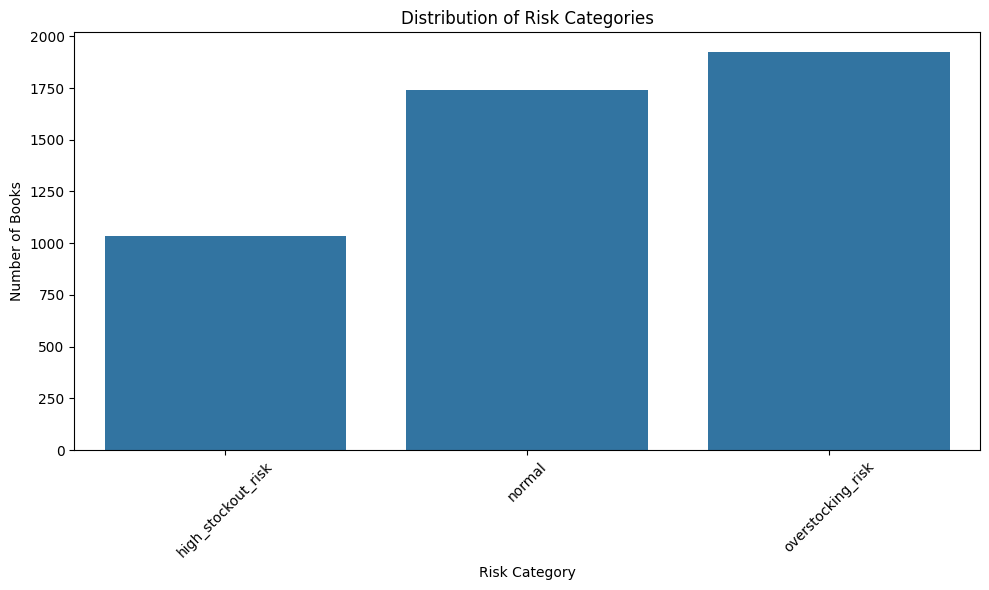

In [53]:
# Visualize the distribution of risk categories
plt.figure(figsize=(10, 6))
sns.countplot(data=classified_df, x='risk_category')
plt.title('Distribution of Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()

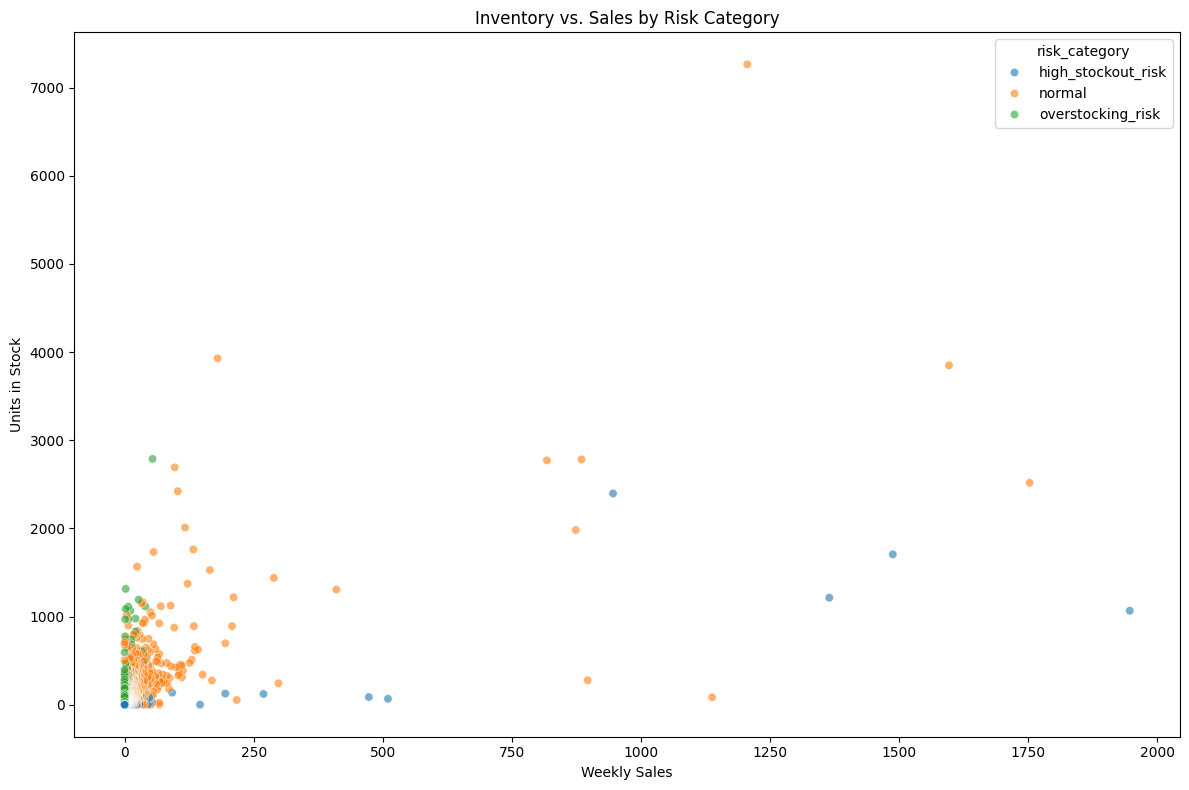

In [54]:
# Visualize the relationship between inventory and sales for different risk categories
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=classified_df,
    x='Retailer sales out last week',
    y='Retailer number of units in stock',
    hue='risk_category',
    alpha=0.6
)
plt.title('Inventory vs. Sales by Risk Category')
plt.xlabel('Weekly Sales')
plt.ylabel('Units in Stock')
plt.tight_layout()